In [1]:
from datetime import datetime as dt
import pytz
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
tickers = ['SBER.ME','RASP.ME','PLZL.ME',
          'YNDX.ME','MTLR.ME','RUAL.ME',
          'MAGN.ME','ROSN.ME','HYDR.ME']

investor = np.array([0.22, 0.14, 0.12,
                     0.06, 0.07, 0.12,
                     0.08, 0.10, 0.09])

stock = yf.download(tickers,'2017-01-01', '2022-01-31') 

[*********************100%***********************]  9 of 9 completed


In [4]:
adj_close = stock[['Adj Close']] # получить цену закрытия
earn = adj_close.pct_change() # рассчитать доходность за день
mean_earn = earn.mean()
cov_matrix = earn.cov()

investor_earn = np.sum(mean_earn * investor) # общая доходность по предложению инвестора
investor_stdev = np.sqrt(np.dot(investor.T,np.dot(cov_matrix, investor))) # стандартное отклонение
investor_sharpe = investor_earn/investor_stdev # коэффициент Шарпа портфеля

investor_res = np.array([investor_earn, investor_stdev, investor_sharpe])
investor_res = np.concatenate((investor_res, investor), axis=0)
investor_res *= 100
investor_res_df = pd.DataFrame(investor_res, columns=['Investor'], index=['earn','stdev','sharpe',
                tickers[0],tickers[1],tickers[2],tickers[3],tickers[4],tickers[5],tickers[6],tickers[7],tickers[8]])

investor_res_df

,Investor
earn,0.071072
stdev,1.251101
sharpe,5.680753
SBER.ME,22.000000
RASP.ME,14.000000
PLZL.ME,12.000000
YNDX.ME,6.000000
MTLR.ME,7.000000
RUAL.ME,12.000000
MAGN.ME,8.000000


In [5]:
num_iterations = 10000
simulation = np.zeros((12,num_iterations))

for i in range(num_iterations): 
        weights = np.array(np.random.random(9)) # выставляем случайные веса
        weights /= np.sum(weights) # сумма весов := 1
        earn = np.sum(mean_earn * weights) # доходность
        stdev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) # стандартное отклонение
        simulation[0,i] = earn # сохраняем текущие значения доходности
        simulation[1,i] = stdev # сохраняем текущее отклонение
        simulation[2,i] = simulation[0,i] / simulation[1,i] # сохраняем текущий коэффициент
        for j in range(9):    # сохраняем текущие веса
                simulation[j+3,i] = weights[j]

simulation_df = pd.DataFrame(simulation.T,columns=['earn','stdev','sharpe',
                tickers[0],tickers[1],tickers[2],tickers[3],tickers[4],tickers[5],tickers[6],tickers[7],tickers[8]])

simulation_df.multiply(100)

,earn,stdev,sharpe,SBER.ME,RASP.ME,PLZL.ME,YNDX.ME,MTLR.ME,RUAL.ME,MAGN.ME,ROSN.ME,HYDR.ME
0,0.082398,1.371066,6.009809,15.649636,17.228678,20.081803,12.913920,19.548239,5.632272,5.052921,0.800345,3.092186
1,0.065082,1.507895,4.316104,18.020304,1.344039,25.857317,4.374809,8.703356,8.200978,18.880848,4.683952,9.934396
2,0.080990,1.505868,5.378302,17.184160,2.216733,24.733548,9.560127,24.186445,2.945342,9.783437,0.042145,9.348064
3,0.072220,1.223930,5.900625,19.710018,22.617281,11.911590,8.723582,3.336791,10.093590,7.428186,7.220101,8.958859
4,0.073656,1.401437,5.255784,6.448123,1.505676,20.503041,9.590633,8.275145,17.083706,10.462357,18.638952,7.492366
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.078580,1.380910,5.690487,9.601563,12.848225,16.360446,7.651771,8.303265,9.875745,15.263393,18.282829,1.812762
9996,0.091908,1.318725,6.969482,6.954140,2.022645,10.108605,14.773636,10.684428,10.451589,18.628698,4.981126,21.395133
9997,0.091586,1.372953,6.670733,13.705746,5.138261,0.585626,5.333450,13.325024,17.899172,24.643911,14.693699,4.675111
9998,0.099939,1.459864,6.845807,7.164933,8.607962,8.581151,2.922759,21.119489,3.169309,21.270167,21.212624,5.951607


In [6]:
max_sharpe = simulation_df.iloc[simulation_df['sharpe'].idxmax()] # портфель с максимальным коэф. Шарпа
max_sharpe.multiply(100)

earn        0.114245
stdev       1.217146
sharpe      9.386324
SBER.ME     4.545473
RASP.ME    18.501018
PLZL.ME     1.883135
YNDX.ME    26.702490
MTLR.ME    22.626217
RUAL.ME     1.166390
MAGN.ME     2.078965
ROSN.ME     9.936608
HYDR.ME    12.559703
Name: 5492, dtype: float64

In [7]:
min_std = simulation_df.iloc[simulation_df['stdev'].idxmin()] # портфель с минимальным стандартным отклонением
min_std.multiply(100)

earn        0.073623
stdev       1.099798
sharpe      6.694235
SBER.ME    22.629910
RASP.ME    18.137096
PLZL.ME     4.455053
YNDX.ME    22.615107
MTLR.ME     1.682242
RUAL.ME    18.559752
MAGN.ME     0.027437
ROSN.ME     4.214795
HYDR.ME     7.678608
Name: 3806, dtype: float64

<IPython.core.display.Javascript object>


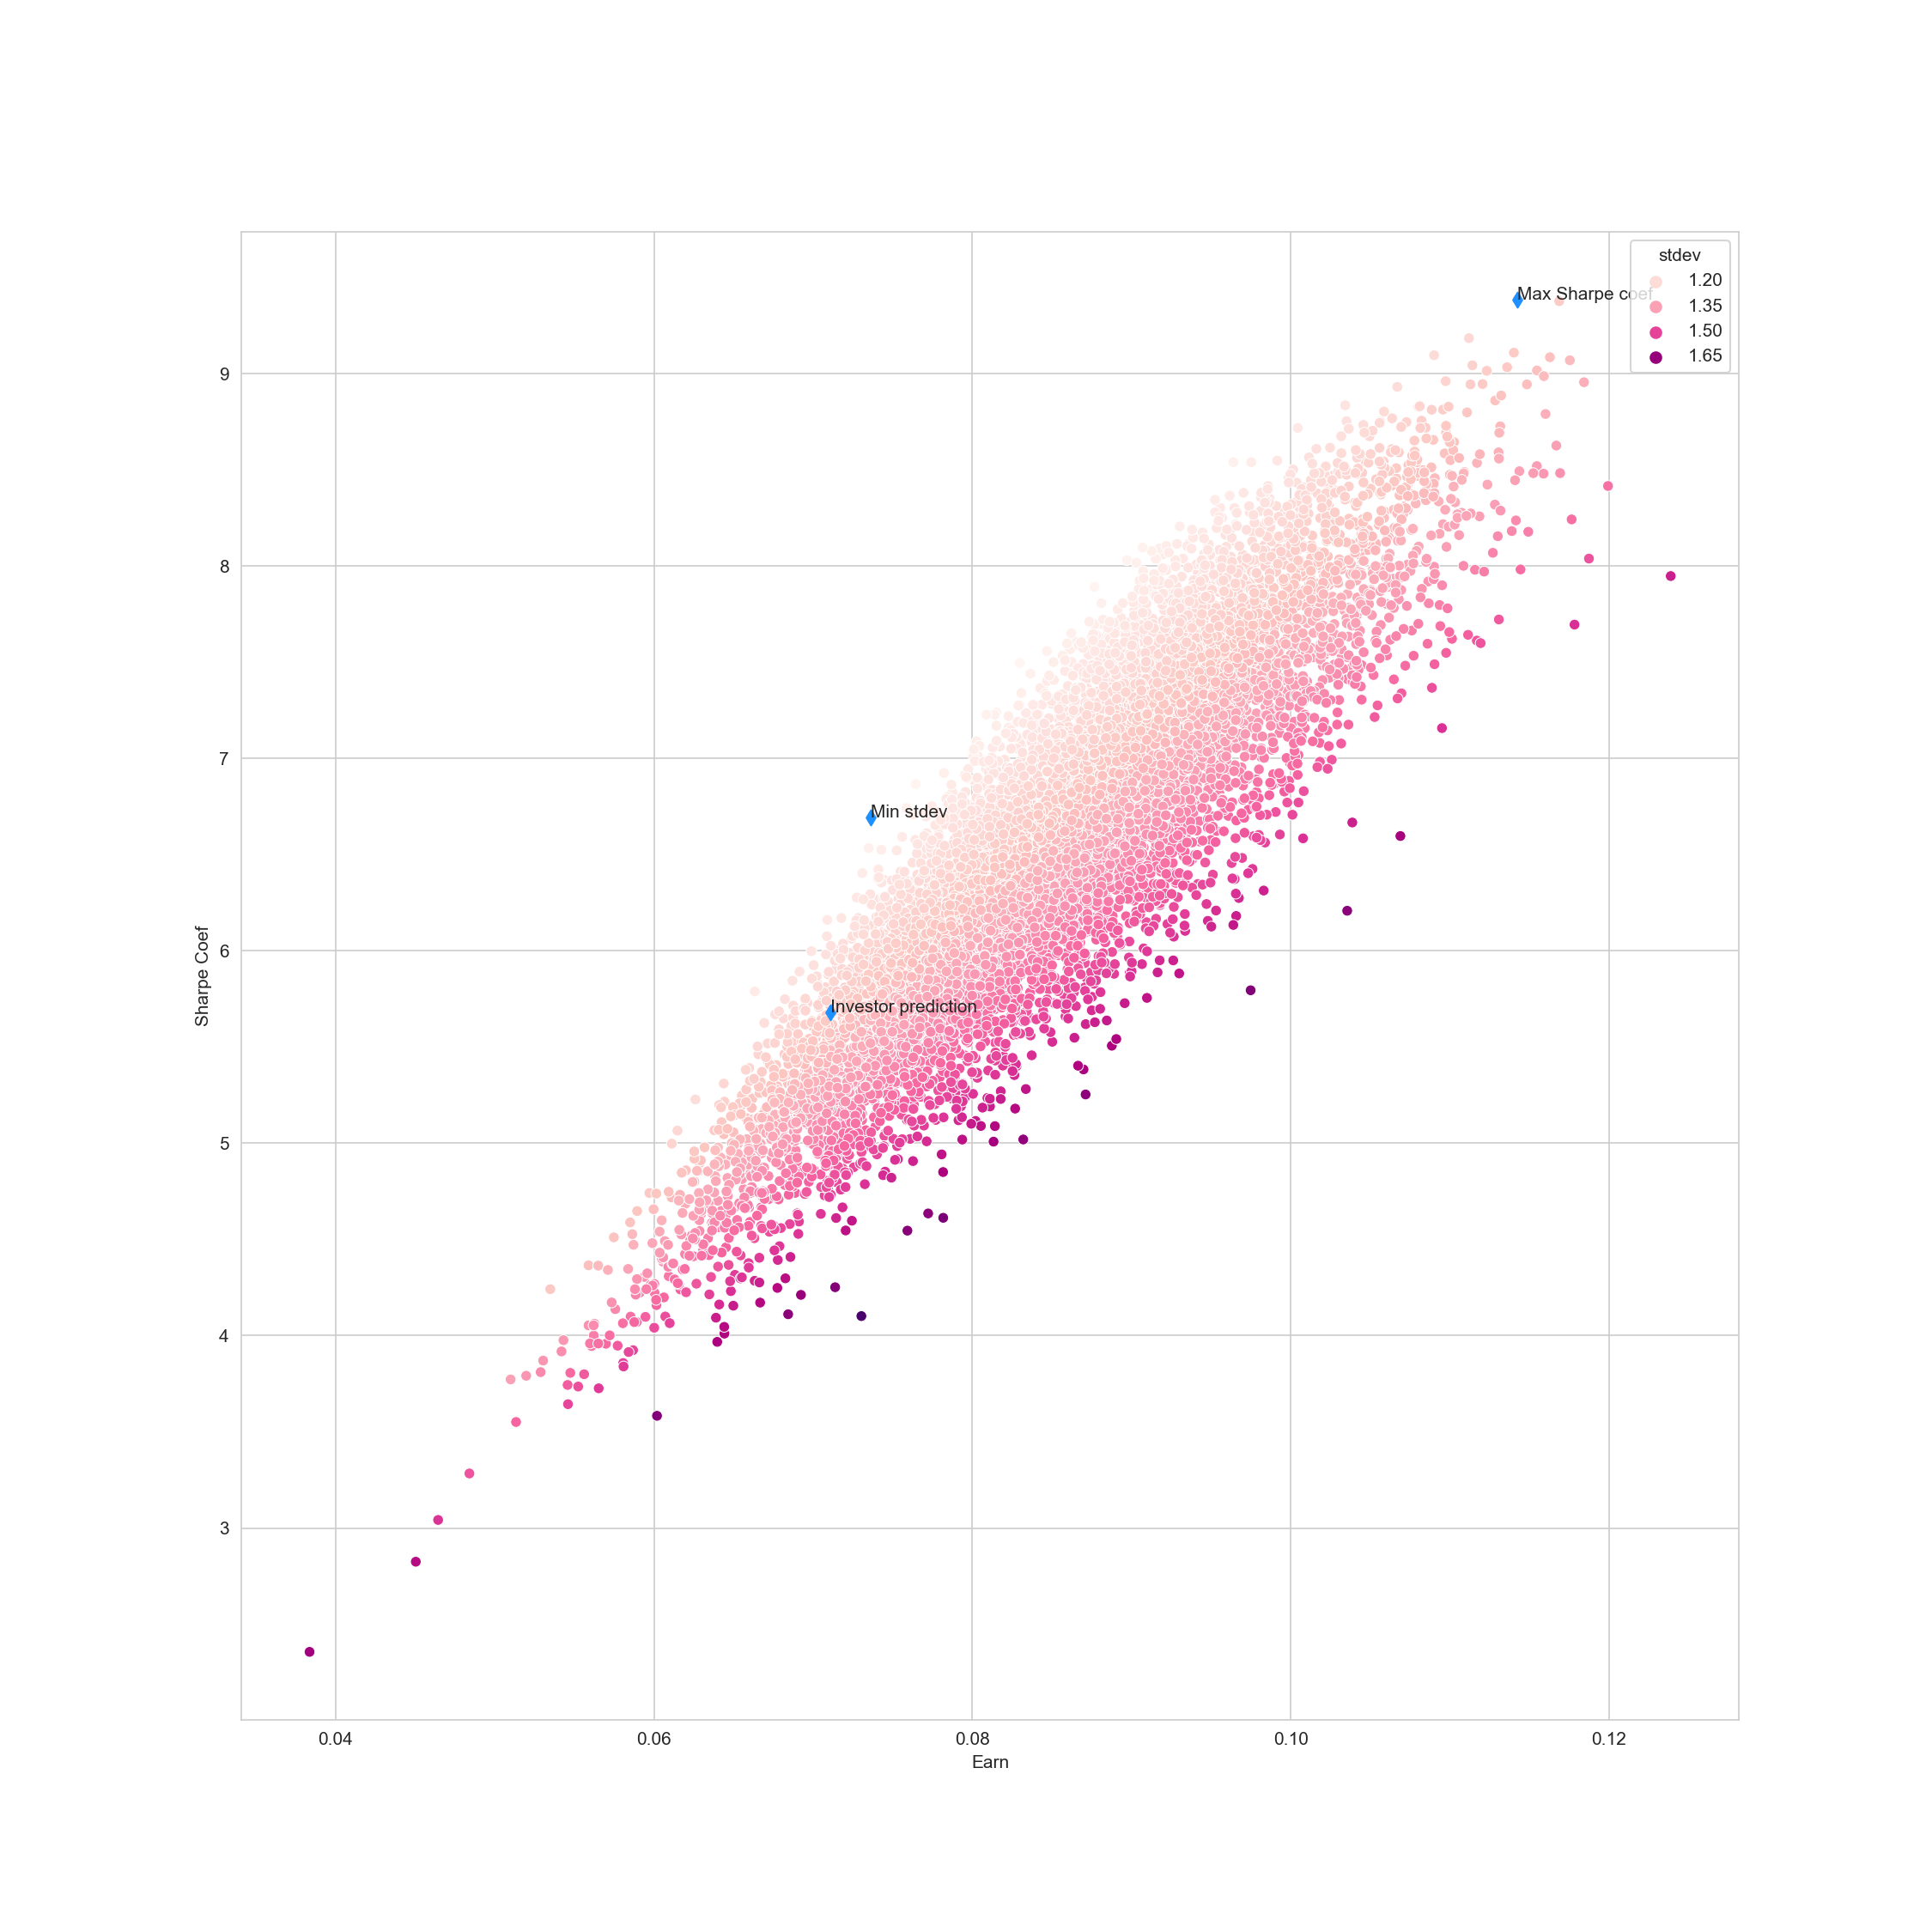

In [47]:
sns.set_style('whitegrid')
sns.despine()
sns.axes_style("ticks")
fig, ax = plt.subplots(figsize=(15, 15))

sns.scatterplot(x=(simulation_df.earn.multiply(100)),y=(simulation_df.sharpe.multiply(100)), 
                hue = (simulation_df.stdev.multiply(100)), palette = "RdPu") 
plt.xlabel('Earn')
plt.ylabel('Sharpe Coef')

plt.scatter(max_sharpe[0]*100,max_sharpe[2]*100,marker="d",color='dodgerblue')
plt.text(max_sharpe[0]*100,max_sharpe[2]*100, 'Max Sharpe coef')

plt.scatter(min_std[0]*100,min_std[2]*100,marker="d",color='dodgerblue')
plt.text(min_std[0]*100,min_std[2]*100, 'Min stdev')

plt.scatter(investor_earn*100, investor_sharpe*100, marker="d",color='dodgerblue')
plt.text(investor_earn*100, investor_sharpe*100, 'Investor prediction')

plt.show()
plt.savefig('2dfigure.png')

<IPython.core.display.Javascript object>


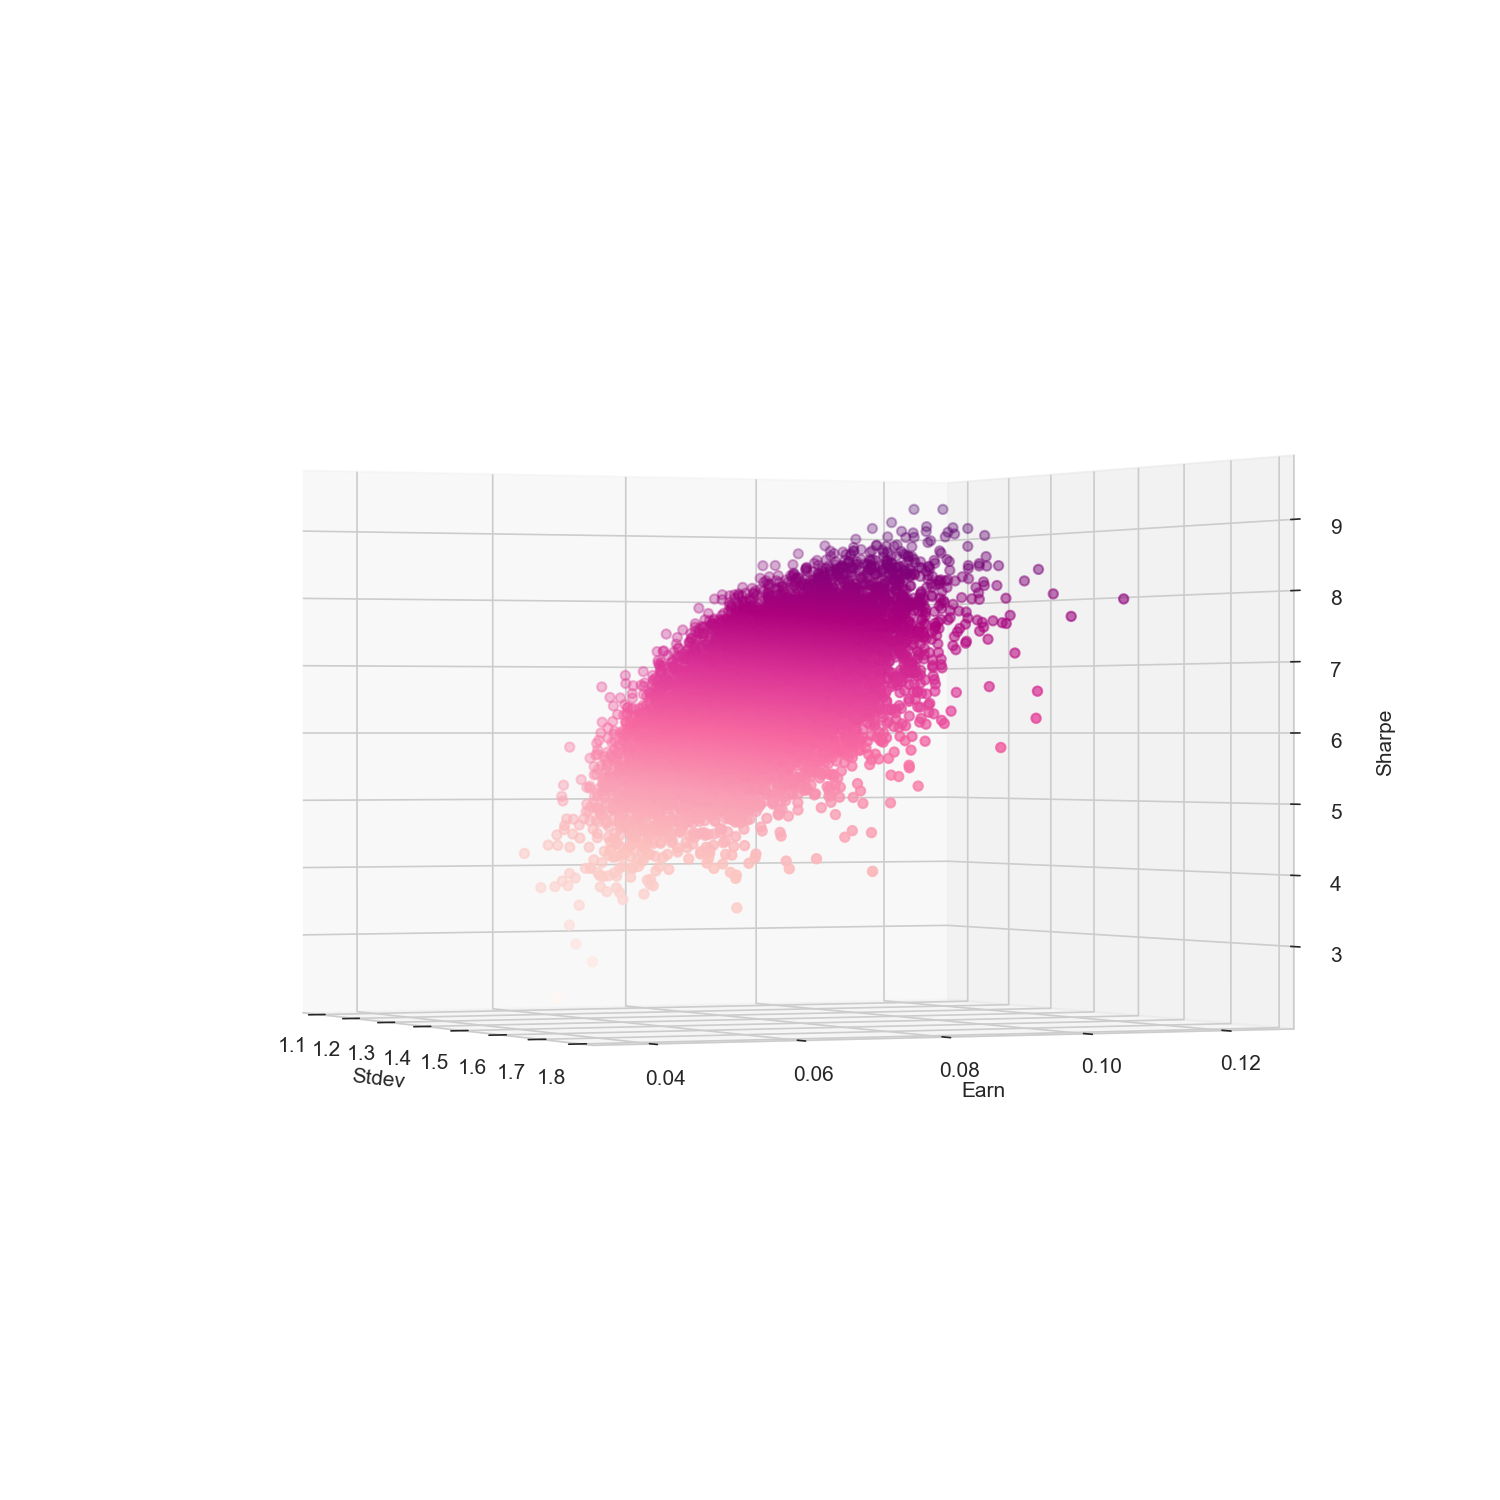

In [46]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')

x = simulation_df.stdev.multiply(100)
y = simulation_df.earn.multiply(100)
z = simulation_df.sharpe.multiply(100)

ax.set_xlabel("Stdev")
ax.set_ylabel("Earn")
ax.set_zlabel("Sharpe")

ax.scatter3D(x, y, z,c = (x + y + z),cmap = "RdPu")